In [1]:
import requests
import osmnx as ox

                                            geometry  bbox_north  bbox_south  \
0  POLYGON ((222219.771 -4050395.343, 224043.539 ...  -35.698392  -37.364474   

    bbox_east   bbox_west   place_id  osm_type   osm_id        lat        lon  \
0  175.903215  173.896328  298615087  relation  2094141 -36.541281  174.55061   

            display_name     class            type  importance  
0  Auckland, New Zealand  boundary  administrative        0.66  


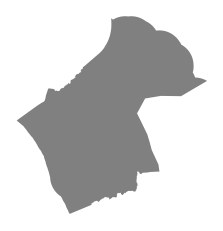

In [2]:
# Find Auckland location from osmx package
city = ox.geocode_to_gdf("Auckland, NZ")
city_proj = ox.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")
print(city_proj)

In [3]:
# Find Auckland BBox and download street informations
north, south, east, west = city_proj['bbox_north'][0],city_proj['bbox_south'][0],city_proj['bbox_east'][0],city_proj['bbox_west'][0]

G = ox.graph_from_bbox(north,south,west,east, network_type='walk',
    simplify=False,
    retain_all=True,
    custom_filter = '["highway"~"unclassified|trunk|primary|tertiary|secondary|track|path|residential"]')
print(G)

MultiDiGraph with 624978 nodes and 1280502 edges


In [5]:
gdf = ox.geometries.geometries_from_bbox(north, south, east, west,tags={'amenity':True,'shop':True})
print(gdf)

                                  amenity  \
element_type osmid                          
node         850055554            parking   
             936116124               cafe   
way          140624820             school   
             486569706            parking   
node         1027056415           parking   
...                                   ...   
way          1021771366     parking_space   
             1021771367     parking_space   
             1021771368     parking_space   
             1024234275  place_of_worship   
             1029560335           toilets   

                                                                  geometry  \
element_type osmid                                                           
node         850055554                         POINT (174.34740 -36.70543)   
             936116124                         POINT (174.33970 -36.61160)   
way          140624820   POLYGON ((174.29736 -36.54161, 174.29790 -36.5...   
             486569706  